## 24.05.23

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# csv 파일을 콤마(,)로 구분하여 데이터 정리,
# 첫 번째 행에 nan값이 발생해 skip_header로 첫번째 행을 무시했습니다.
dart = np.genfromtxt('dart2.csv', delimiter=',', skip_header=1)

print(dart)
print(dart.shape)

[[279.92502751 310.32784421   3.        ]
 [402.9678488   84.95383835   3.        ]
 [432.89975573 241.30419732   3.        ]
 ...
 [311.83418543 201.44834568   2.        ]
 [295.15791995 272.46578393   0.        ]
 [273.14295712 161.16917887   1.        ]]
(6738, 3)



dart2.csv 파일에는 열이 세개가 있습니다. >> x, y, color

군집화 후 시각화 하였을때 csv 자체 color로 사용할 때와,

학습하여 km.labels_로 사용할 때 그림을 비교해볼게요.

In [46]:
# 둘의 차이를 보기 위해 dart에서 2열(3번째 열)을 변수에 할당 해줍니다.
# csv 고유의 color 값입니다.
target = dart[ : , 2]

print(dart, end="\n\n")

[[279.92502751 310.32784421   3.        ]
 [402.9678488   84.95383835   3.        ]
 [432.89975573 241.30419732   3.        ]
 ...
 [311.83418543 201.44834568   2.        ]
 [295.15791995 272.46578393   0.        ]
 [273.14295712 161.16917887   1.        ]]



변수 이름이 이전 dart로 같으면 추후 개별 실행할 때

인덱싱 오류가 발생할 수 있으므로 주의해줍니다.

ex) dart = np.delete(dart, 2, axis=1) 변수를 지정하고 실행한 뒤
다시 target 셀을 실행하면,

target 입장에선 dart의 열이 [0,1] 이므로
3번째 열을 추출해 낼 수 없습니다.

In [53]:
# 현재까진 dart의 열이 [x,y,color] 이므로 비교를 위해 color 열을 지워줍니다.

# 여기서 axis의 값이 0이면 행을, 1이면 열을 기준으로 작동합니다.
# 2번째, 열을 삭제
dart2 = np.delete(dart, 2, axis=1)
print(target)

[3. 3. 3. ... 2. 0. 1.]


적절한 클러스터(n_clusters) 값을 찾기 위해 엘보우 기법을 사용하겠습니다.

엘보우 기법(elbow method)란?

클러스터 중점과 각 데이터 간의 거리를 기반으로 계산하여
최적의 클러스터 개수를 확인하는 방법 입니다.

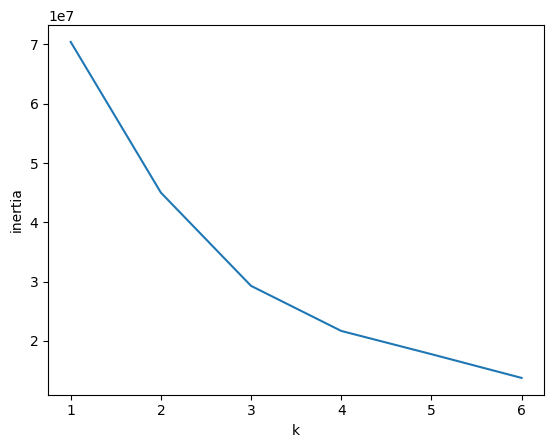

In [48]:
from sklearn.cluster import KMeans #K평균을 임포트 합니다.
inertia = []
for k in range(1, 7):#범위는 대략적으로 지정했습니다. 필요에 따라 넓어질 수 있어요!
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(dart2)
    inertia.append(km.inertia_)

plt.plot(range(1, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

결과적으로 3 또는 4 지점 이후로는 기울기가 완만해 지기 때문에

값이 더 커지면 의미가 없습니다.

두개의 값 중 하나로 지정하겠습니다.

In [50]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(dart2)
print(np.unique(km.labels_, return_counts=True))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([2057, 2432, 2249]))


Text(0.5, 1.0, 'Machine')

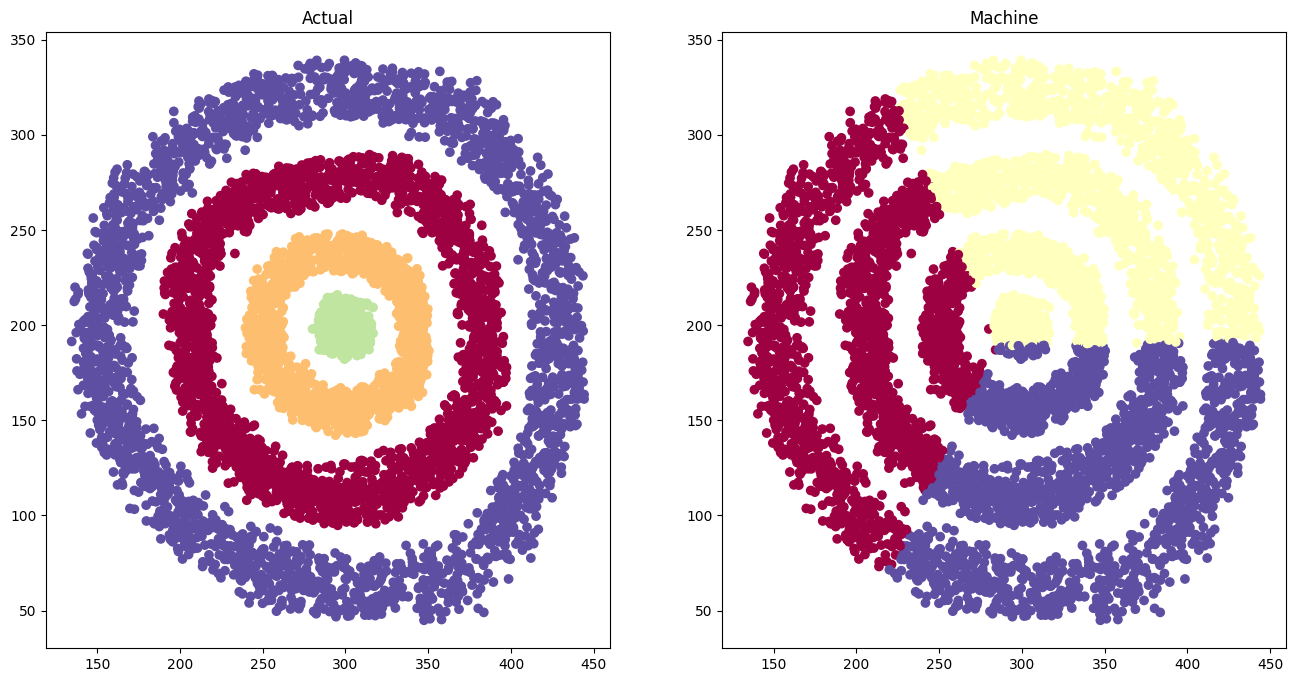

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))
axs[0].scatter(dart2[:, 0], dart2[:, 1], c=target, cmap='Spectral')
axs[1].scatter(dart2[:, 0], dart2[:, 1], c=km.labels_, cmap='Spectral')
axs[0].set_title('Actual')
axs[1].set_title('Machine')


#axs[0]은 왼쪽 그래프, axs[1]은 오른쪽 그래프에요.
#각각 csv파일의 target으로 했을때, km.labels_로 했을때 결과입니다.

csv에 포함된 color(target)로 진행한 결과와 학습한 결과가 다른 양상을 띕니다.

이번에는 클러스터 개수를 4개로 늘려볼게요!

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2, 3], dtype=int32), array([1996, 1683, 1568, 1491]))


Text(0.5, 1.0, 'Machine')

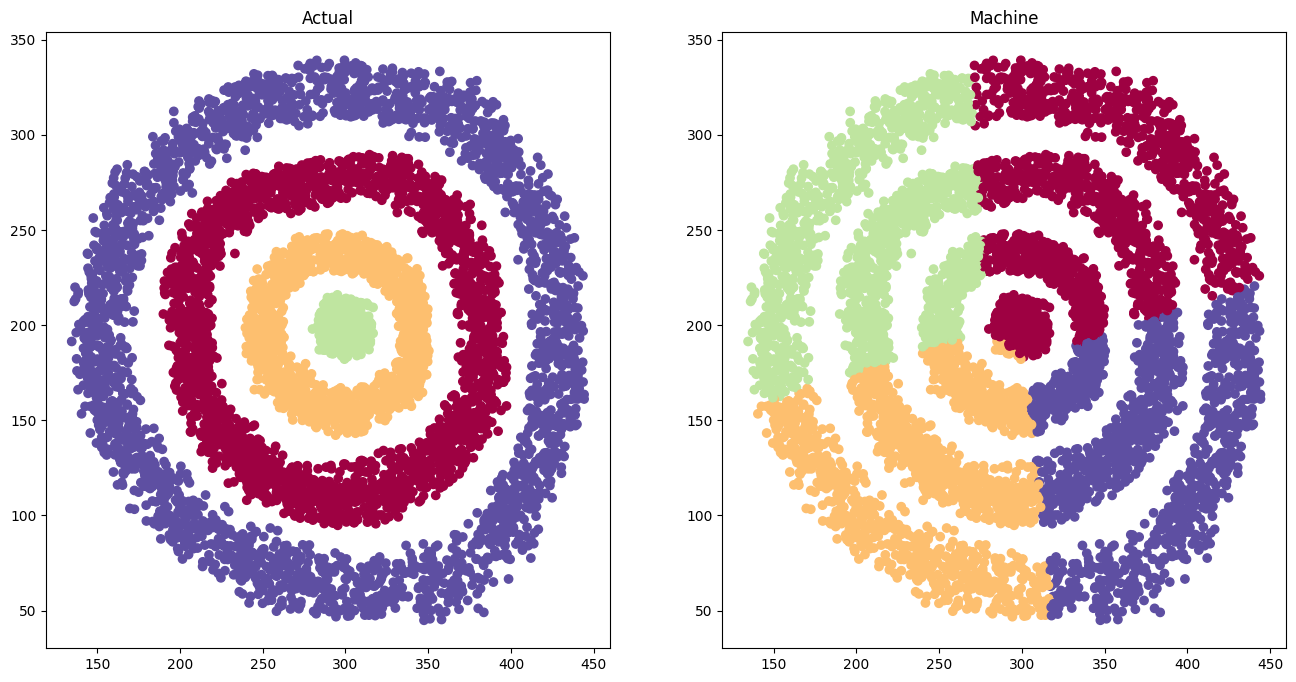

In [55]:
km = KMeans(n_clusters=4, random_state=42) #n_clusters 개수를 4로 변경
km.fit(dart2)
print(np.unique(km.labels_, return_counts=True))

#클러스터 개수 변경 후 다시 그려보기
fig, axs = plt.subplots(1, 2, figsize=(16,8))
axs[0].scatter(dart2[:, 0], dart2[:, 1], c=target, cmap='Spectral')
axs[1].scatter(dart2[:, 0], dart2[:, 1], c=km.labels_, cmap='Spectral')
axs[0].set_title('Actual')
axs[1].set_title('Machine')

감사합니다^^

##번외

위에선 데이터가 단순한 형태 [x,y,color]로 구성 되었지만,

복잡한 데이터(많은 피처)를 군집화하려면
PCA를 사용하여 **차원축소** 하여야 합니다.

In [58]:
from sklearn.decomposition import PCA
import numpy as np

# 샘플 데이터: 100개의 샘플과 10개의 특성
X = np.random.rand(100, 10)

# PCA 객체 생성 (주성분 2개로 차원 축소)
pca = PCA(n_components=2)

# 모델을 적합시키고 차원 축소를 적용
X_reduced = pca.fit_transform(X)

# 축소된 데이터 출력
print(X_reduced)


# 설명된 분산 비율 출력
print(pca.explained_variance_ratio_)


[[ 0.57889491  0.19142343]
 [ 0.19395441 -0.03349001]
 [-0.35700085 -0.17029183]
 [-0.79250652 -0.0114643 ]
 [ 0.07863406  0.04934498]
 [ 0.50077403 -0.1305308 ]
 [-0.04728429 -0.00820478]
 [ 0.03307331 -0.29398449]
 [-0.52170173  0.50769576]
 [ 0.22111102  0.46468972]
 [ 0.35054275 -0.25016558]
 [-0.33144017  0.45356811]
 [-0.24939379 -0.19774957]
 [-0.29640287 -0.27159783]
 [ 0.36311003  0.66727955]
 [ 0.48606928 -0.372547  ]
 [-0.48730488  0.35332153]
 [-0.66479725  0.07187644]
 [ 0.40154243  0.23285817]
 [-0.12953112  0.20317975]
 [ 0.18305952 -0.09349602]
 [-0.10066367  0.15526364]
 [-0.34291459 -0.2035305 ]
 [-0.02149659 -0.79802902]
 [-0.03759869  0.03317894]
 [ 0.06086372  0.52269067]
 [ 0.20736357  0.43822171]
 [ 0.07595617  0.16651706]
 [ 0.29472972 -0.06222039]
 [-0.16213041  0.1188471 ]
 [-0.4403441  -0.42589743]
 [-0.24450721  0.11517105]
 [-0.03432781  0.30121454]
 [ 0.73972467 -0.13473525]
 [-0.37440543 -0.25985439]
 [ 0.54239537  0.03566622]
 [ 0.1273293  -0.02681081]
 